<a href="https://colab.research.google.com/github/DanyPao/DataScience1-Daniela-Esposito/blob/main/Visualizacion_Daniela_Esposito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Predicción de climática en Australia (Prediccion de lluvia al dia siguiente)
## Alumna:
Daniela Paola Espósito
## Comisión:
61140
## Docente:
Jorge Ruiz
## Tutora:
Abril Noguera

## Abstract

Hoy en día muchas empresas tanto privadas como estatales precisan de las predicciones meteorológicas; en muchas ramas como en la agricultura, ganadería, construcción, minería, aeronáutica, navegación, salud pública, gestión de riesgo, turismo, pesca, energías renovables, logística, investigadores y científicos, para dar alertas a la población ante fenómenos meteorológicos extremos, incluso para deportes o recitales.
No debemos olvidar que inclusive el común de los ciudadanos necesita saber cómo estará el clima para poder realizar sus actividades cotidianas sin problemas.
Todas estas áreas utilizan las predicciones meteorológicas principalmente para planificación y toma de decisiones, ya que el clima puede afectar la seguridad y eficiencia en estas áreas.
A través de este modelo de Machine Learning podremos llegar una aproximación sobre la probabilidad de lluvias al día siguiente en función de los datos proporcionados.
Podemos hacernos las siguientes preguntas:
¿Cuánta humedad había el día anterior a que lloviera?
¿Llovió el día anterior a que lloviera?
¿Hubo mucho viento el día anterior?
¿Qué temperaturas hubo en diferentes horarios el día anterior?
¿Hay ubicaciones que están relacionadas?
¿El tipo de clima de la región modifica las probabilidades de lluvia para el día siguiente?
¿La presión atmosférica del día anterior influye en la probabilidad de lluvias?
Para realizar esta investigación, sería mucho más eficaz si la base de datos contara con fechas en que fueron realizadas las mediciones para poder comparar entre las diferentes ubicaciones en el mismo día, o al menos que contara con las estaciones del año, ya que no es lo mismo las temperaturas o las lluvias en verano, invierno, otoño o primavera.


## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='husl')

## Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience1-Daniela-Esposito/main/Weather%20Training%20Data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Descripcion de Variables

Ubicacion - Nombre de la ciudad de Australia.

MinTemp - Temperatura mínima durante un dia en particular. (grados Celsius)

MaxTemp - Temperatura máxima durante un día particular. (grados Celsius)

Lluvia - Caída de lluvia durante un dia en particular. (milímetros)

Evaporacion - Evaporacion durante un día en particular. (milímetros)

LuzSolar - Luz solar durante un dia en particular. (horas)

DirRafVien - Dirección de la ráfaga de viento más fuerte en un día en particular. (16 puntos cardinales)

VelRafVien - Velocidad de la ráfaga de viento más fuerte en un día en particular. (kilometros por hora)

DirVien9am - Dirección del viento durante 10 minutos antes de las 9 am. (puntos cardinales)

DirVien3pm - Dirección del viento durante 10 minutos antes de las 3 pm. (puntos cardinales)

VelVien9am - Velocidad del viento durante 10 minutos antes de las 9 am. (Kilómetros por hora)

VelVien3pm - Velocidad del viento durante 10 minutos antes de las 3 pm. (Kilómetros por hora)

Humedad9am - Humedad del viento a las 9 am. (porcentaje)

Humedad3pm - Humedad del viento a las 3 pm. (porcentaje)

Presion9am - Presión atmosférica a las 9 am. (hectopascales)

Presion3pm - Presión atmosférica a las 3 pm. (hectopascales)

Nubes9am - Partes del cielo oscurecidas por nubes a las 9 am. (octavos)

Nubes3pm - Partes del cielo oscurecidas por nubes a las 3 pm. (octavos)

Temp9am - Temperatura a las 9 am. (grados Celsius)

Temp3pm - Temperatura a las 3 pm. (grados Celsius)

LluviaHoy - Si hoy llueve, entonces "Sí". Si hoy no llueve entonces 'No'.

LluviaManana - Si mañana llueve, entonces 1 (Sí). Si mañana no llueve entonces 0 (No).

## Normalización

In [4]:
df=df.rename(columns={'Location':'Ubicacion', 'Rainfall':'Lluvia', 'Evaporation':'Evaporacion', 'Sunshine':'LuzSolar', 'WindGustDir':'DirRafVien', 'WindGustSpeed':'VelRafVien', 'WindDir9am':'DirVien9am', 'WindDir3pm':'DirVien3pm', 'WindSpeed9am':'VelVien9am', 'WindSpeed3pm':'VelVien3pm', 'Humidity9am':'Humedad9am', 'Humidity3pm':'Humedad3pm', 'Pressure9am':'Presion9am', 'Pressure3pm':'Presion3pm', 'Cloud9am':'Nubes9am', 'Cloud3pm':'Nubes3pm', 'RainToday':'LluviaHoy', 'RainTomorrow':'LluviaManana'})
df.head()

,row ID,Ubicacion,MinTemp,MaxTemp,Lluvia,Evaporacion,LuzSolar,DirRafVien,VelRafVien,DirVien9am,DirVien3pm,VelVien9am,VelVien3pm,Humedad9am,Humedad3pm,Presion9am,Presion3pm,Nubes9am,Nubes3pm,Temp9am,Temp3pm,LluviaHoy,LluviaManana
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Estadistica descriptiva

In [5]:
df.describe().round(2)

,MinTemp,MaxTemp,Lluvia,Evaporacion,LuzSolar,VelRafVien,VelVien9am,VelVien3pm,Humedad9am,Humedad3pm,Presion9am,Presion3pm,Nubes9am,Nubes3pm,Temp9am,Temp3pm,LluviaManana
count,99073.00,99286.00,98537.00,56985.00,52199.00,93036.00,98581.0,97681.00,98283.00,97010.00,89768.00,89780.00,61944.00,59514.00,98902.00,97612.00,99516.00
mean,12.18,23.22,2.35,5.46,7.62,39.98,14.0,18.65,68.87,51.43,1017.68,1015.29,4.45,4.52,16.97,21.68,0.22
std,6.39,7.12,8.49,4.16,3.78,13.58,8.9,8.80,19.07,20.78,7.11,7.05,2.89,2.72,6.49,6.93,0.42
min,-8.50,-4.10,0.00,0.00,0.00,6.00,0.0,0.00,0.00,0.00,980.50,978.20,0.00,0.00,-7.00,-5.10,0.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.0,13.00,57.00,37.00,1013.00,1010.50,1.00,2.00,12.30,16.60,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.0,19.00,70.00,52.00,1017.70,1015.30,5.00,5.00,16.70,21.10,0.00
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.0,24.00,83.00,65.00,1022.40,1020.00,7.00,7.00,21.50,26.40,0.00
max,33.90,48.10,371.00,86.20,14.50,135.00,130.0,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row ID        99516 non-null  object 
 1   Ubicacion     99516 non-null  object 
 2   MinTemp       99073 non-null  float64
 3   MaxTemp       99286 non-null  float64
 4   Lluvia        98537 non-null  float64
 5   Evaporacion   56985 non-null  float64
 6   LuzSolar      52199 non-null  float64
 7   DirRafVien    92995 non-null  object 
 8   VelRafVien    93036 non-null  float64
 9   DirVien9am    92510 non-null  object 
 10  DirVien3pm    96868 non-null  object 
 11  VelVien9am    98581 non-null  float64
 12  VelVien3pm    97681 non-null  float64
 13  Humedad9am    98283 non-null  float64
 14  Humedad3pm    97010 non-null  float64
 15  Presion9am    89768 non-null  float64
 16  Presion3pm    89780 non-null  float64
 17  Nubes9am      61944 non-null  float64
 18  Nubes3pm      59514 non-nu

In [7]:
df['Ubicacion']=df['Ubicacion'].astype('category')
df['DirRafVien']=df['DirRafVien'].astype('category')
df['DirVien9am']=df['DirVien9am'].astype('category')
df['DirVien3pm']=df['DirVien3pm'].astype('category')
df['Nubes9am']=df['Nubes9am'].astype('category')
df['Nubes3pm']=df['Nubes3pm'].astype('category')
df['LluviaHoy']=df['LluviaHoy'].astype('category')
df['LluviaManana']=df['LluviaManana'].astype('category')

In [19]:
df.describe(include='category')

,Ubicacion,DirRafVien,DirVien9am,DirVien3pm,LluviaHoy,LluviaManana
count,99516,99516,99516,99516,99516,99516
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,0
freq,2393,13364,15058,10058,77460,77157


In [9]:
df.shape

(99516, 23)

In [10]:
df.columns

Index(['row ID', 'Ubicacion', 'MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion',
       'LuzSolar', 'DirRafVien', 'VelRafVien', 'DirVien9am', 'DirVien3pm',
       'VelVien9am', 'VelVien3pm', 'Humedad9am', 'Humedad3pm', 'Presion9am',
       'Presion3pm', 'Nubes9am', 'Nubes3pm', 'Temp9am', 'Temp3pm', 'LluviaHoy',
       'LluviaManana'],
      dtype='object')

In [11]:
cantNaN= pd.DataFrame({'Cantidad':df.isna().sum(),'Porcentaje':(df.isna().sum())/(df.shape[0])*(100)})
cantNaN

,Cantidad,Porcentaje
row ID,0,0.000000
Ubicacion,0,0.000000
MinTemp,443,0.445155
MaxTemp,230,0.231119
Lluvia,979,0.983761
Evaporacion,42531,42.737851
LuzSolar,47317,47.547128
DirRafVien,6521,6.552715
VelRafVien,6480,6.511516
DirVien9am,7006,7.040074


Las columnas 'Evaporacion', 'LuzSolar', 'Nubes9am' y 'Nubes3pm' tienen un porcentaje mayor al 35% de números faltantes. Y la columna 'row ID'es inutil.

Por lo tanto, eliminaré estas columnas.


In [12]:
df.drop(['row ID','Evaporacion','LuzSolar','Nubes9am','Nubes3pm'],axis=1,inplace=True)

In [13]:
df.shape

(99516, 18)

Para el caso de las variables categoricas, voy a reemplazar los datos faltantes (NaN) por la moda de la ubicación correspondiente. Y en el caso de las variables numéricas, las reemplazaré por la mediana o media (según crea conveniente), también por ubicación.

(Intenté realizar la mediana con un ciclo For y con groupby para reemplazar los NaN según la ubicacion para tener mejores resultados pero no lo he logrado. Por el momento lo dejaré asi, para poder realizar esta entrega. Pero continuaré intentantando resolverlo.)

In [14]:
#Reemplazo de NaNs en Variables Categoricas por la Moda
df['DirRafVien'].fillna(df['DirRafVien'].mode()[0],inplace=True)
df['DirVien9am'].fillna(df['DirVien9am'].mode()[0],inplace=True)
df['DirVien3pm'].fillna(df['DirVien3pm'].mode()[0],inplace=True)
df['LluviaHoy'].fillna(df['LluviaHoy'].mode()[0],inplace=True)

#Reemplazo de NaNs en Variables Numéricas por la Mediana o Media
df['MinTemp'].fillna(df['MinTemp'].median(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(),inplace=True)
df['Lluvia'].fillna(df['Lluvia'].median(),inplace=True)
df['VelRafVien'].fillna(df['VelRafVien'].median(),inplace=True)
df['VelVien9am'].fillna(df['VelVien9am'].median(),inplace=True)
df['VelVien3pm'].fillna(df['VelVien3pm'].median(),inplace=True)
df['Humedad9am'].fillna(df['Humedad9am'].median(),inplace=True)
df['Humedad3pm'].fillna(df['Humedad3pm'].median(),inplace=True)
df['Presion9am'].fillna(df['Presion9am'].median(),inplace=True)
df['Presion3pm'].fillna(df['Presion3pm'].median(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(),inplace=True)

#Verificación
df.isna().sum()

Ubicacion       0
MinTemp         0
MaxTemp         0
Lluvia          0
DirRafVien      0
VelRafVien      0
DirVien9am      0
DirVien3pm      0
VelVien9am      0
VelVien3pm      0
Humedad9am      0
Humedad3pm      0
Presion9am      0
Presion3pm      0
Temp9am         0
Temp3pm         0
LluviaHoy       0
LluviaManana    0
dtype: int64

## Cardinalidad

In [29]:
cardinalidad=pd.DataFrame({'Cantidad':df.nunique()})
cardinalidad

,Cantidad
Ubicacion,49
MinTemp,386
MaxTemp,500
Lluvia,601
DirRafVien,16
VelRafVien,67
DirVien9am,16
DirVien3pm,16
VelVien9am,43
VelVien3pm,44


## Outliers

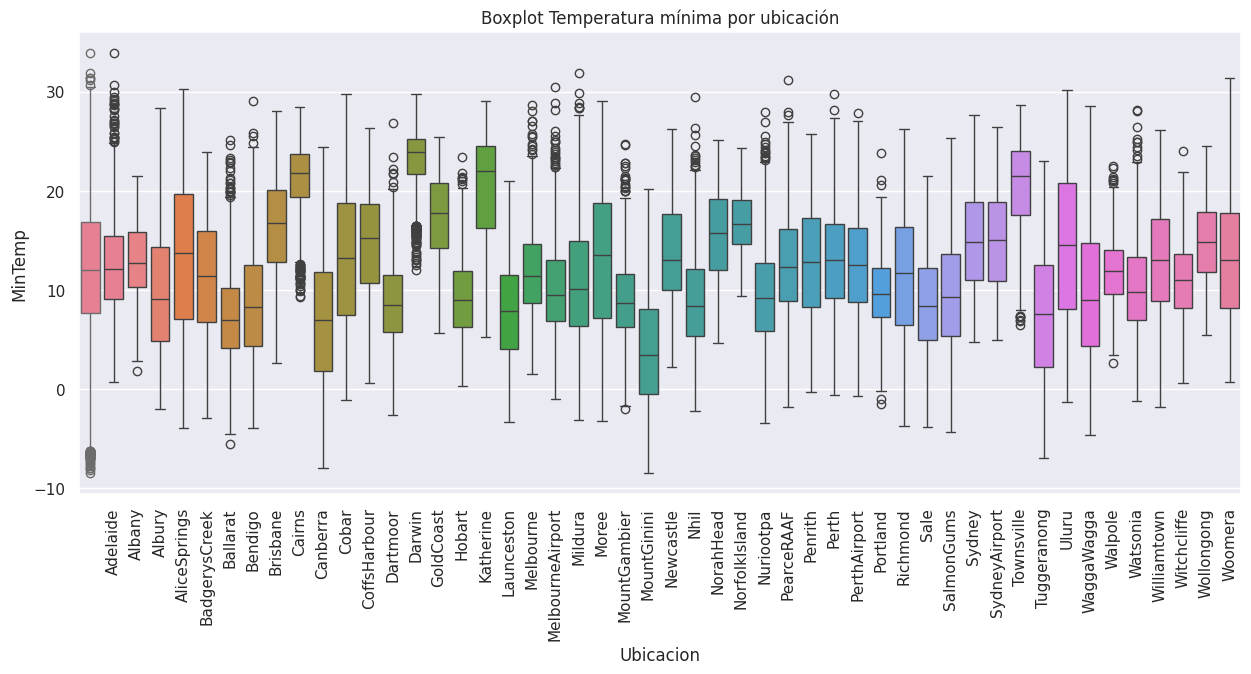

In [15]:
plt.figure(figsize=(15,6))
plt.title('Boxplot Temperatura mínima por ubicación')
sns.boxplot(y=df.MinTemp)
ax=sns.boxplot(y=df.MinTemp, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

En este gráfico se puede apreciar que la temperatura mínima general parece tener una gran cantidad de outliers en sus valores mas bajos.
Pero, cuando se desglosa por ubicación, al haber localidades muy al sur, estos valores estan dentro de los valores normales para su latitud.
Y por lo contrario, se puede ver que hay muchos outliers en los valores mas altos para algunas ubicaciones.

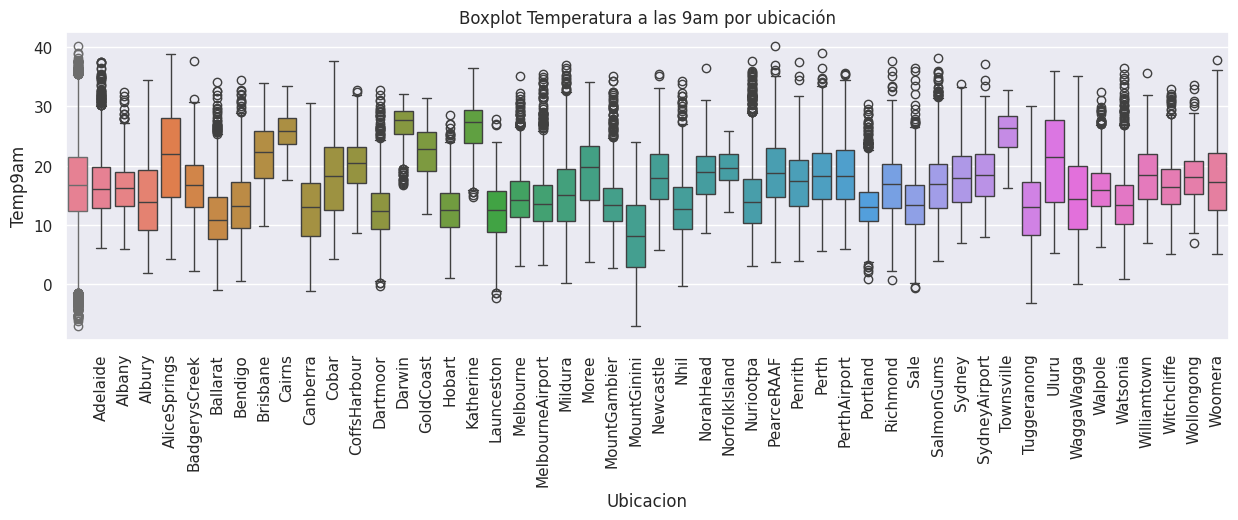

In [16]:
plt.figure(figsize=(15,4))
plt.title('Boxplot Temperatura a las 9am por ubicación')
sns.boxplot(y=df.Temp9am)
ax=sns.boxplot(y=df.Temp9am, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

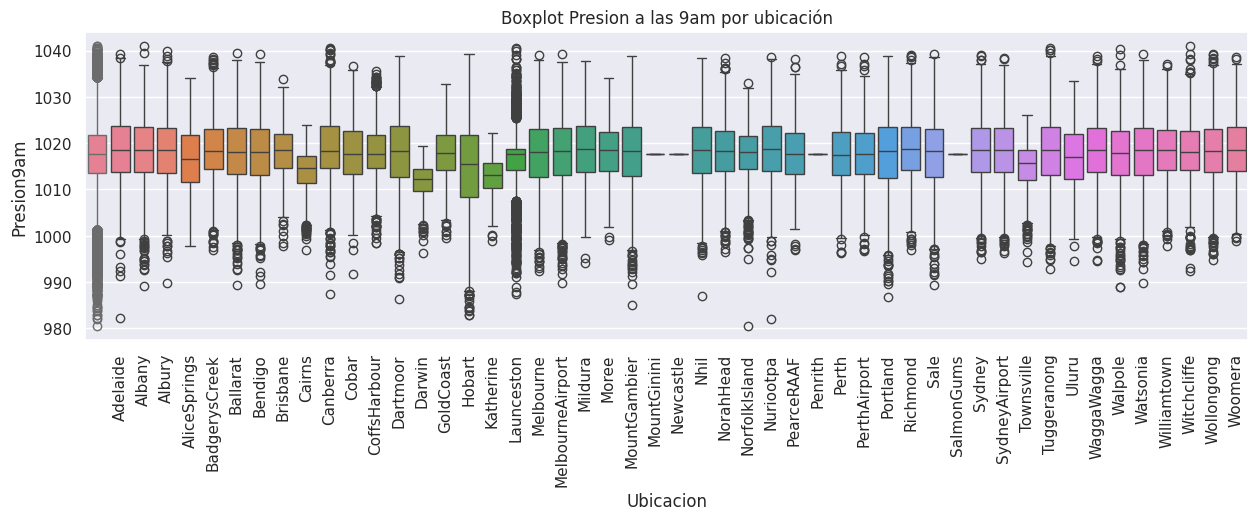

In [17]:
plt.figure(figsize=(15,4))
plt.title('Boxplot Presion a las 9am por ubicación')
sns.boxplot(y=df.Presion9am)
ax=sns.boxplot(y=df.Presion9am, x=df.Ubicacion, hue=df.Ubicacion)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Lo mismo sucede con otras variables numéricas como por ejemplo la humedad o la temperatura a las 9am.
Por esta razon yo trataría estos outliers teniendo en cuenta su ubicación.

## Correlación

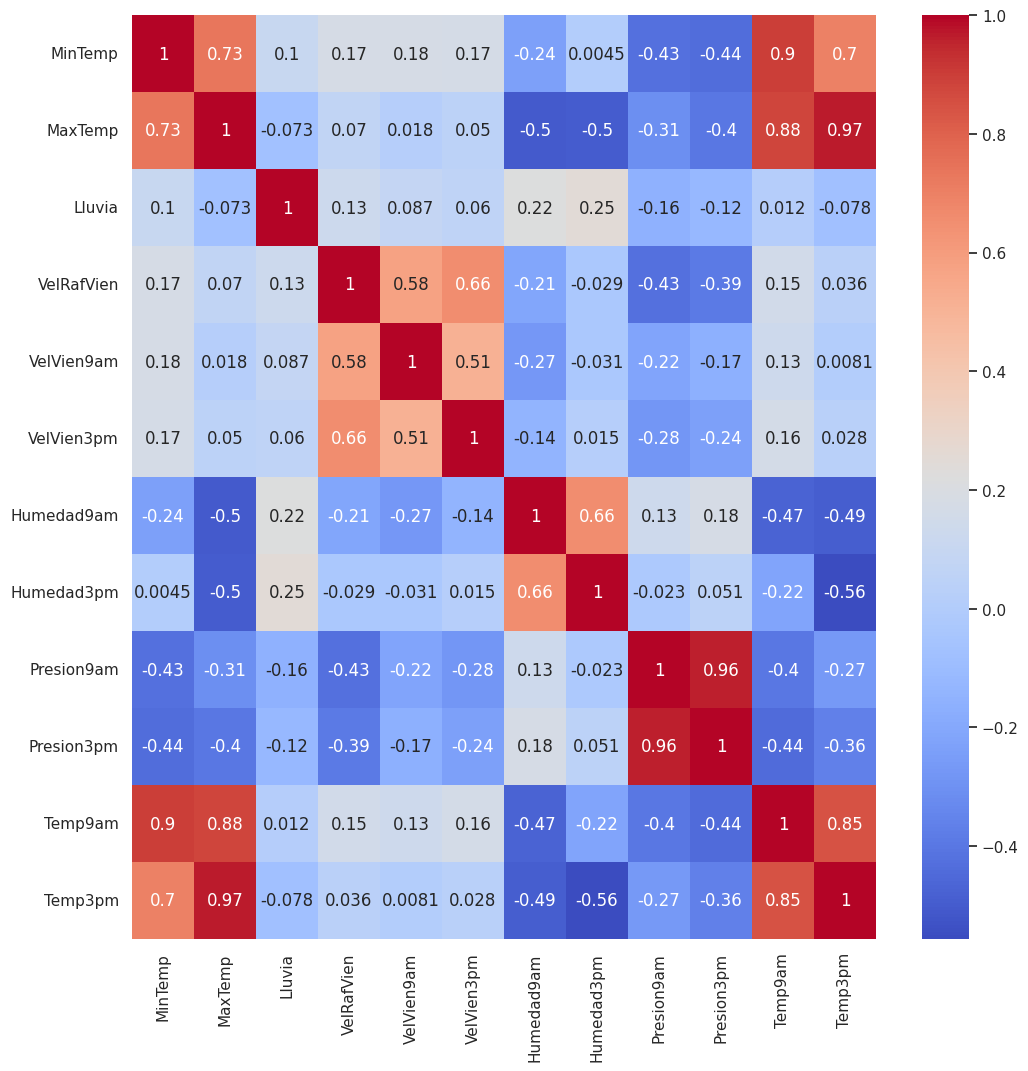

In [24]:
plt.figure(figsize=(12,12))
matriz_correlacion= df.corr(numeric_only=True)
sns.heatmap(matriz_correlacion,cmap='coolwarm',annot=True)
plt.show()

Se puede decir con respecto a este gráfico que las mayores correlaciones son entre el mismo tipo de variable a diferente hora o entre maximos y minimos, como por ejemplo, la relacion entre Tem9am, Temp3pm, MinTemp y MaxTemp.

## Vientos

Text(0, 0.5, 'Cantidad de datos')

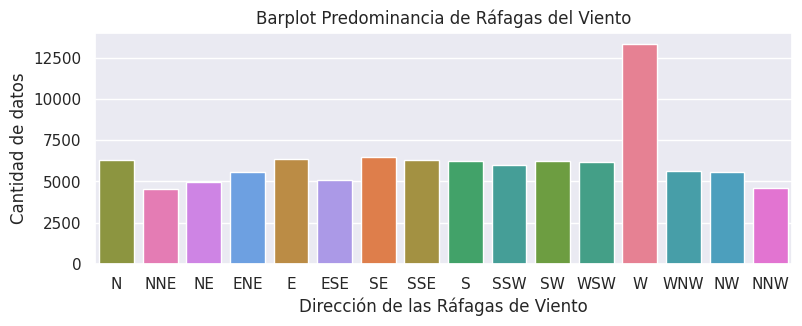

In [33]:
DirViento=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Ráfagas del Viento')
sns.barplot(x=df['DirRafVien'].value_counts().index, y=df['DirRafVien'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección de las Ráfagas de Viento')
plt.ylabel('Cantidad de datos')

Text(0, 0.5, 'Cantidad de datos')

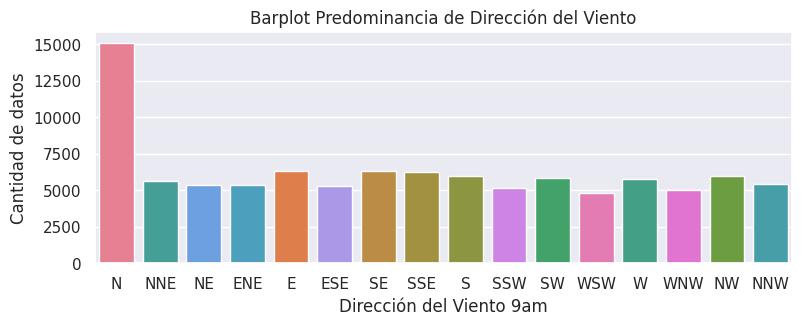

In [26]:
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Dirección del Viento')
sns.barplot(x=df['DirVien9am'].value_counts().index, y=df['DirVien9am'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección del Viento 9am')
plt.ylabel('Cantidad de datos')

Text(0, 0.5, 'Cantidad de datos')

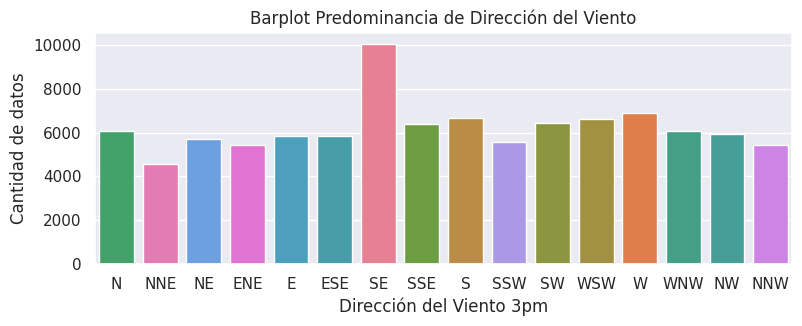

In [27]:
plt.figure(figsize=(9,3))
plt.title('Barplot Predominancia de Dirección del Viento')
sns.barplot(x=df['DirVien3pm'].value_counts().index, y=df['DirVien3pm'].value_counts(), hue=DirViento, order=DirViento, legend=False)
plt.xlabel('Dirección del Viento 3pm')
plt.ylabel('Cantidad de datos')

## Humedad

Text(0, 0.5, 'suma')

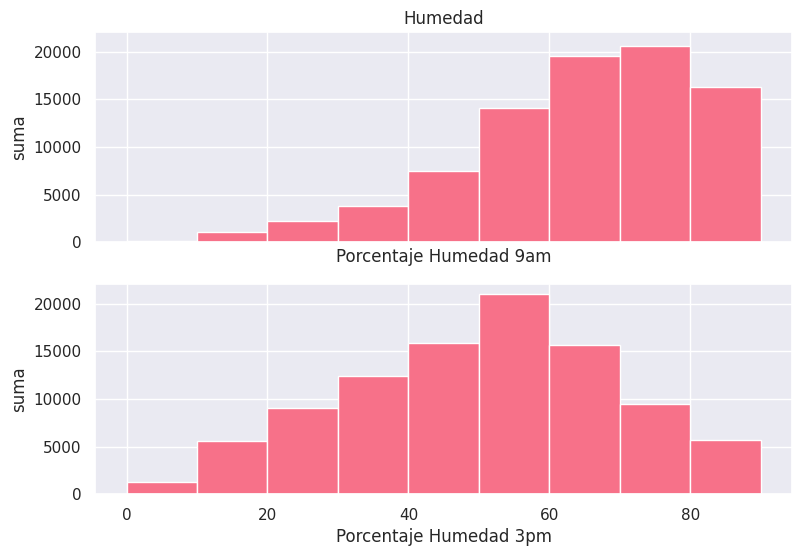

In [61]:
bin_range=range(0,100,10)
fig, ax=plt.subplots(nrows=2, ncols=1,figsize=(9,6), sharex=True,sharey=True)
ax[0].hist(df['Humedad9am'], label='Humedad 9am',bins=range(0,100,10))
ax[1].hist(df['Humedad3pm'], label='Humedad 3pm',bins=range(0,100,10))
ax[0].set_title('Humedad')
ax[0].set_xlabel('Porcentaje Humedad 9am')
ax[1].set_xlabel('Porcentaje Humedad 3pm')
ax[0].set_ylabel('suma')
ax[1].set_ylabel('suma')

## Lluvia Hoy

Text(0.5, 1.0, 'Gráfico de Torta Porcenaje de Lluvia Hoy')

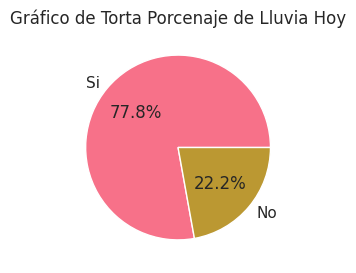

In [28]:
Etiqueta=['Si','No']
plt.figure(figsize=(3,3))
plt.pie(df['LluviaHoy'].value_counts(), labels=Etiqueta, autopct='%1.1f%%')
plt.title('Gráfico de Torta Porcenaje de Lluvia Hoy')

## Temperatura Mínima vs Temperatura Máxima

Text(0, 0.5, 'Temperatura Máxima')

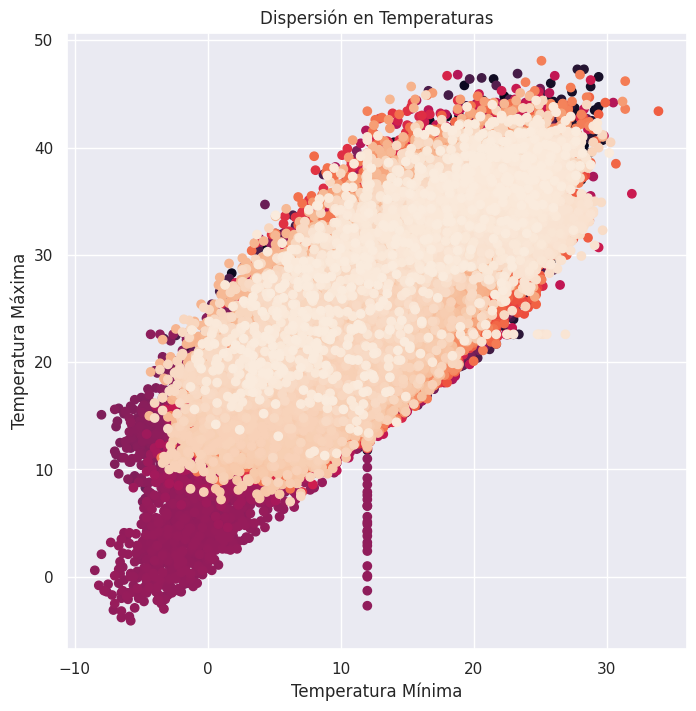

In [63]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(df['MinTemp'],df['MaxTemp'],c=df.index)
ax.set_title('Dispersión en Temperaturas')
ax.set_xlabel('Temperatura Mínima')
ax.set_ylabel('Temperatura Máxima')

En este gráfico se puede apreciar una correlación muy fuerte entre la temperatura mínima y la temperatura máxima.